In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
deliveries = pd.read_csv('Ipl Data/deliveries.csv')

In [2]:
deliveries=deliveries.replace(to_replace ="Rising Pune Supergiant", value ="Rising Pune Supergiants") 
deliveries=deliveries.replace(to_replace ="Delhi Daredevils", value ="Delhi Capitals") 
deliveries=deliveries.replace(to_replace ="Deccan Chargers", value ="Sunrisers Hyderabad")

In [3]:
deliveries[deliveries['inning']==1]

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
193287,1237181,1,Delhi Capitals,Mumbai Indians,20,2,HV Patel,SS Iyer,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,AR Patel,caught,ASRoy
193288,1237181,1,Delhi Capitals,Mumbai Indians,20,3,SS Iyer,SS Tiwary,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
193289,1237181,1,Delhi Capitals,Mumbai Indians,20,4,SS Iyer,SS Tiwary,NM Coulter-Nile,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
193290,1237181,1,Delhi Capitals,Mumbai Indians,20,5,SS Iyer,SS Tiwary,NM Coulter-Nile,0,...,0,0,0,0,6,0,6,NaN,NaN,NaN


In [4]:
total_runs = []
matches = []
batting_team = []
for match_no in deliveries['match_id'].unique():
    df = deliveries[(deliveries['match_id']==match_no) & (deliveries['inning']==1)]
    runs = df['total_runs'].sum()
    total_runs.append(runs)
    matches.append(match_no)
    batting_team.append(df['batting_team'].unique()[0])

In [5]:
df1 = pd.DataFrame()
df1['match_no'] = matches
df1['batting_team'] = batting_team
df1['total_runs'] = total_runs
df1

,match_no,batting_team,total_runs
0,1,Sunrisers Hyderabad,207
1,2,Mumbai Indians,184
2,3,Gujarat Lions,183
3,4,Rising Pune Supergiants,163
4,5,Royal Challengers Bangalore,157
...,...,...,...
811,1216495,Mumbai Indians,149
812,1237177,Mumbai Indians,200
813,1237178,Royal Challengers Bangalore,131
814,1237180,Delhi Capitals,189


In [6]:
final_runs = []
final_team = []
for team in df1['batting_team'].unique():
    max_run = df1[df1['batting_team']==team]['total_runs'].max()
    final_runs.append(max_run)
    final_team.append(team)
final_runs, final_team

([233, 230, 208, 195, 263, 250, 231, 252, 246, 231, 178, 192],
 ['Sunrisers Hyderabad',
  'Mumbai Indians',
  'Gujarat Lions',
  'Rising Pune Supergiants',
  'Royal Challengers Bangalore',
  'Kolkata Knight Riders',
  'Delhi Capitals',
  'Kings XI Punjab',
  'Chennai Super Kings',
  'Rajasthan Royals',
  'Kochi Tuskers Kerala',
  'Pune Warriors'])

C:\Users\kavan\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

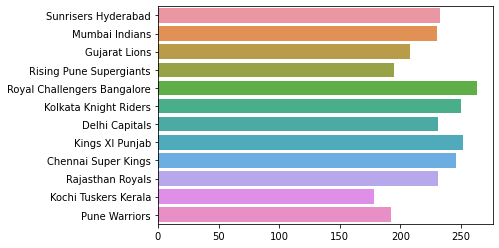

In [7]:
sns.barplot(final_runs, final_team)